# Installations

In [0]:
!pip install albumentations==0.4.5

     |████████████████████████████████| 122kB 7.6MB/s 
     |████████████████████████████████| 634kB 9.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=c358ff92503bc983c3cdcd6f72cfd389793d3cefb172c40cc22d496c3c9ba756
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=cb739410f8314d6f82f8af807e21e5e019c40690a48ab9c210075a911e54f5c3
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


# Google Drive Connection

In [0]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.19-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [0]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session11"

# Assignment 1
---

Below is the code you used to draw ZIGZAG or CYCLIC TRIANGLE plot.

In [0]:
from __future__ import print_function
import math
import numpy
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#----------------------------- Code to display and save plot -------------------------------#
def visualize_save_graph_matplotlib(lines, title, xaxis_title, yaxis_title, path, name):
  plt.figure(figsize=(20,10))
  for line in lines:
    plt.plot(line['x'], line['y'], label=line['name'])
  
  plt.title(title)
  plt.xlabel(xaxis_title)
  plt.ylabel(yaxis_title)
  plt.legend()
  plt.savefig(path+"/"+name+".png")

#----------------------------- Code to generate cyclic triangular plot -------------------------------#
def cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration):
  lr = []
  #max_iteration = 50
  delta_lr = lr_max - lr_min
  x_axis = [i for i in range(max_iteration + 1)]
  for iteration_num in range(max_iteration + 1):
    cycle = math.floor(1 + (iteration_num/(2*step_size)))
    x = abs((iteration_num/step_size) - (2*cycle) + 1)
    lr.append(lr_min + delta_lr*(1-x))
  return x_axis, lr

def generate_cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration, path, name):
  x_axis, lr = cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration)

  # display graph
  lines = [{'x': x_axis, 'y': [lr_max]*len(x_axis), 'name': 'max_lr'}, {'x': x_axis, 'y': lr, 'name': 'lr'}, {'x': x_axis, 'y': [lr_min]*len(x_axis), 'name': 'min_lr'}]
  title, xaxis_title, yaxis_title = "Cyclic Learning Rate", "Iteration", "Learning Rate"
  #display_graph(lines, title, xaxis_title, yaxis_title)
  visualize_save_graph_matplotlib(lines, title, xaxis_title, yaxis_title, path, name)

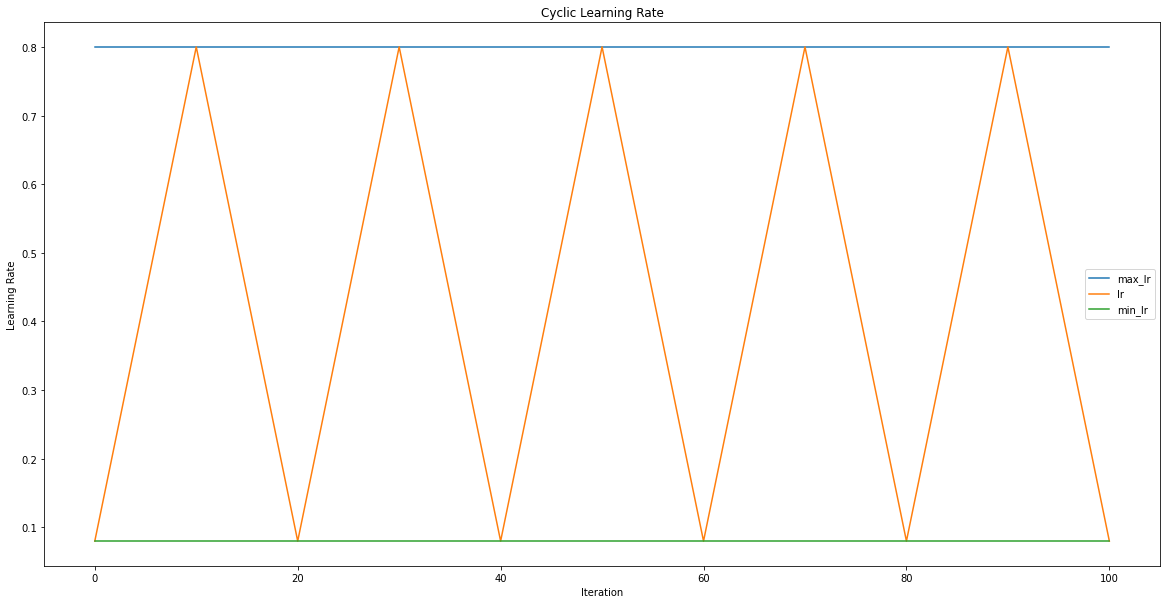

In [0]:
from custom_cyclic_learning_rate import *

lr_min, lr_max, step_size, max_iteration, path, name = 0.08, 0.8, 10, 100, PATH+"/visualization", "clr_graph"
generate_cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration, path, name)

# Assignment 2

## Custom Residual Network on CIFAR10
---

1) Used [CustomResidualNet](https://github.com/genigarus/EVA4/blob/master/API/models/CustomResidualNet.py) model from [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

2) Used data loader with augmentations, model loading, train, and test code to train model on Cifar10

3) Best Test Accuracy = 91.11%, Final Test accuracy = 91.11%, number of epochs = 24. 

4) Used image augmentation with Cutout

[Link to Google Colab Code File](https://colab.research.google.com/drive/1xNBhSGno6mhh_cCQvTPSgbbATQ4jYHem)

[Link to API](https://github.com/genigarus/EVA4/tree/master/API)

# Creating and Executing Pipeline for loading data, creating and training model and hyperparameter tuning

  pip install torch-lr-finder -v --global-option="amp"



 Generating train and test loaders.....
Files already downloaded and verified
Files already downloaded and verified
Finding max LR for One Cycle Policy using LR Test Range over 500 epochs...



Learning rate search finished. See the graph with {finder_name}.plot()
LR (max accuracy 89.3526853492734) to be used: 0.1920000000808


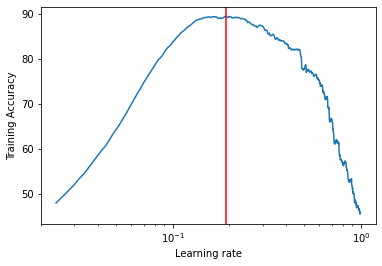

  0%|          | 0/98 [00:00<?, ?it/s]

Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
    

  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 2120/10000 (21.20%)

EPOCH: 2


Loss=2.0861592292785645 Batch_id=97 Accuracy=24.70: 100%|██████████| 98/98 [00:17<00:00,  5.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 3021/10000 (30.21%)

EPOCH: 3


Loss=1.5538564920425415 Batch_id=97 Accuracy=35.94: 100%|██████████| 98/98 [00:17<00:00,  5.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 4522/10000 (45.22%)

EPOCH: 4


Loss=1.5270878076553345 Batch_id=97 Accuracy=48.58: 100%|██████████| 98/98 [00:17<00:00,  5.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5400/10000 (54.00%)

EPOCH: 5


Loss=1.015337586402893 Batch_id=97 Accuracy=58.84: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6354/10000 (63.54%)

EPOCH: 6


Loss=0.997137188911438 Batch_id=97 Accuracy=67.33: 100%|██████████| 98/98 [00:16<00:00,  5.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7148/10000 (71.48%)

EPOCH: 7


Loss=0.7843419313430786 Batch_id=97 Accuracy=72.35: 100%|██████████| 98/98 [00:16<00:00,  5.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7120/10000 (71.20%)

EPOCH: 8


Loss=0.686456561088562 Batch_id=97 Accuracy=75.76: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7882/10000 (78.82%)

EPOCH: 9


Loss=0.5389401316642761 Batch_id=97 Accuracy=78.71: 100%|██████████| 98/98 [00:16<00:00,  5.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8065/10000 (80.65%)

EPOCH: 10


Loss=0.5648478865623474 Batch_id=97 Accuracy=80.58: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8001/10000 (80.01%)

EPOCH: 11


Loss=0.5125367045402527 Batch_id=97 Accuracy=82.34: 100%|██████████| 98/98 [00:16<00:00,  5.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8140/10000 (81.40%)

EPOCH: 12


Loss=0.5160232186317444 Batch_id=97 Accuracy=83.85: 100%|██████████| 98/98 [00:16<00:00,  5.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8352/10000 (83.52%)

EPOCH: 13


Loss=0.4638570547103882 Batch_id=97 Accuracy=84.50: 100%|██████████| 98/98 [00:16<00:00,  5.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8461/10000 (84.61%)

EPOCH: 14


Loss=0.5615224838256836 Batch_id=97 Accuracy=85.98: 100%|██████████| 98/98 [00:17<00:00,  5.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8359/10000 (83.59%)

EPOCH: 15


Loss=0.3423623740673065 Batch_id=97 Accuracy=87.40: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8553/10000 (85.53%)

EPOCH: 16


Loss=0.30666303634643555 Batch_id=97 Accuracy=88.13: 100%|██████████| 98/98 [00:16<00:00,  5.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8603/10000 (86.03%)

EPOCH: 17


Loss=0.32806846499443054 Batch_id=97 Accuracy=88.97: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8530/10000 (85.30%)

EPOCH: 18


Loss=0.251568078994751 Batch_id=97 Accuracy=89.82: 100%|██████████| 98/98 [00:16<00:00,  5.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8528/10000 (85.28%)

EPOCH: 19


Loss=0.3098280429840088 Batch_id=97 Accuracy=90.52: 100%|██████████| 98/98 [00:16<00:00,  5.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8746/10000 (87.46%)

EPOCH: 20


Loss=0.21959669888019562 Batch_id=97 Accuracy=91.90: 100%|██████████| 98/98 [00:16<00:00,  5.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8746/10000 (87.46%)

EPOCH: 21


Loss=0.21492139995098114 Batch_id=97 Accuracy=92.85: 100%|██████████| 98/98 [00:16<00:00,  5.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8883/10000 (88.83%)

EPOCH: 22


Loss=0.1783103346824646 Batch_id=97 Accuracy=93.80: 100%|██████████| 98/98 [00:16<00:00,  5.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8975/10000 (89.75%)

EPOCH: 23


Loss=0.12631919980049133 Batch_id=97 Accuracy=94.81: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9086/10000 (90.86%)

EPOCH: 24


Loss=0.09971646219491959 Batch_id=97 Accuracy=95.80: 100%|██████████| 98/98 [00:16<00:00,  5.84it/s]



Test set: Average loss: 0.0005, Accuracy: 9111/10000 (91.11%)


 Model training completed...

 Saving trained model and parameters...

 Visualizing:


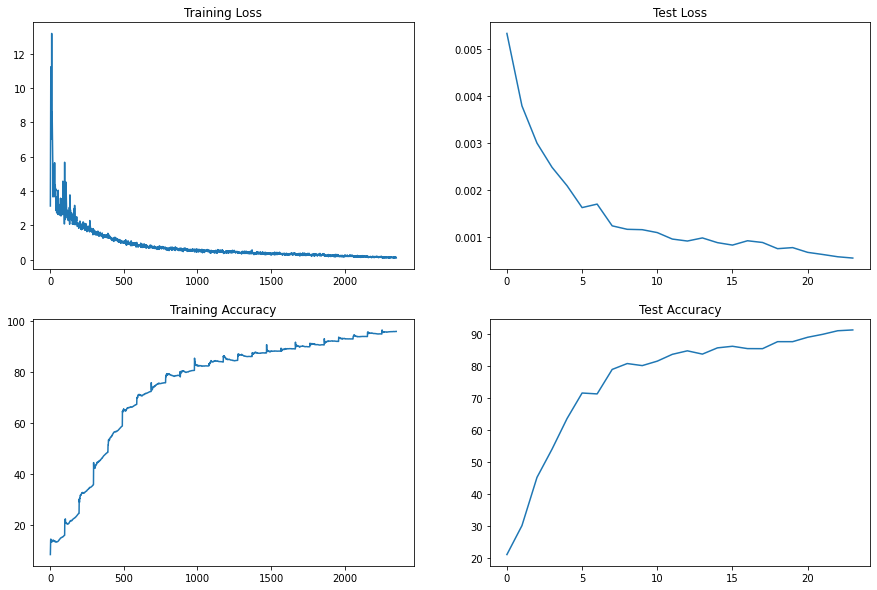

In [0]:
# Import
from network_pipeline import *

# Initialize Variables
seed = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
data_path = PATH+'/data'
need_albumentation = True
batch_size = 512
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
inp_size = (3, 32, 32)
path = PATH+"/model"
model_file_name = "custom_model_residual"

model_name, criterion, optimizer_name, scheduler_name = "CustomResidualNet", nn.CrossEntropyLoss(), "SGD", "OneCycleLR"
init_lr, init_weight_decay, end_lr, num_epochs =  1e-10, 1e-2, 1, 500

# Create Network Pipeline
network = NetworkPipeline(data_path, inp_size, seed, means, stdevs, need_albumentation, batch_size, CIFAR10_CLASS_LABELS, model_name, criterion, optimizer_name, scheduler_name)

# Use LR Test Range to find maximum LR
best_lr = network.find_network_lr(init_lr, init_weight_decay, end_lr, num_epochs)

# Intialize variables for creating and training model
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
DIV_FACTOR = 10

# final_div_factor = div_factor for no annhilation
FINAL_DIV_FACTOR = 10
EPOCHS = 24
MAX_LR_EPOCH = 5
NUM_OF_BATCHES = network.num_of_batches
PCT_START = MAX_LR_EPOCH/EPOCHS

# Based on above found maximum LR, initialize LRMAX and LRMIN
LRMAX = best_lr
LRMIN = LRMAX/DIV_FACTOR

# Initialize optimizer and scheduler parameters
optim_params = {"lr": LRMIN, "momentum": MOMENTUM, "weight_decay": WEIGHT_DECAY}
scheduler_params = {"max_lr": LRMAX, "steps_per_epoch": NUM_OF_BATCHES, "epochs": EPOCHS, "pct_start": PCT_START, "anneal_strategy":"linear", "div_factor": DIV_FACTOR, "final_div_factor": FINAL_DIV_FACTOR}

# Build model with specified optimizer and scheduler
network.build_network(optim_params, scheduler_params)

# Train model
network.train_network(EPOCHS, is_ocp=True)

# Save model and parameters
network.save_network(path, model_file_name)

# Visualize training and test accuracy and loss
print("\n Visualizing:")
visualize_graph(network.train_losses, network.train_acc, network.test_losses, network.test_acc)

Sample Dataset after transformation
 ship  bird airplane automobile airplane


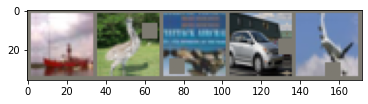

In [0]:
# Display sample data
print("Sample Dataset after transformation")
show_sample_images(network.train_loader, network.labels_list)

# Visualize Training Vs Test Accuracy of Trained Model

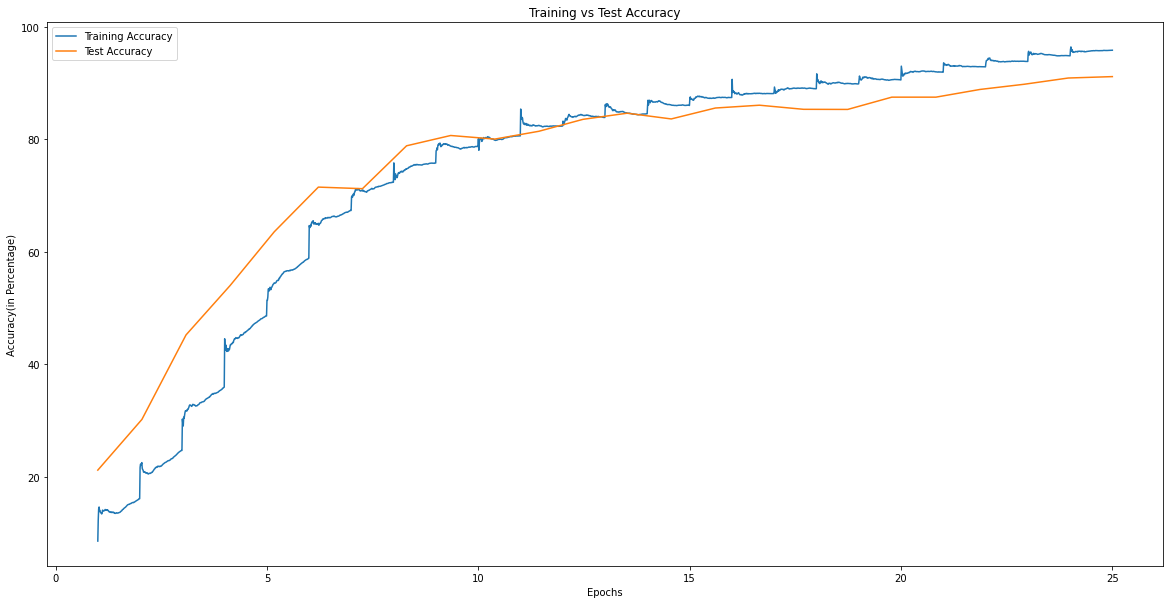

In [0]:
dict_list = {'Training Accuracy': network.train_acc, 'Test Accuracy': network.test_acc}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_graph"

visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, PATH+"/visualization", name=name)

# View Correctly Classified Images
---

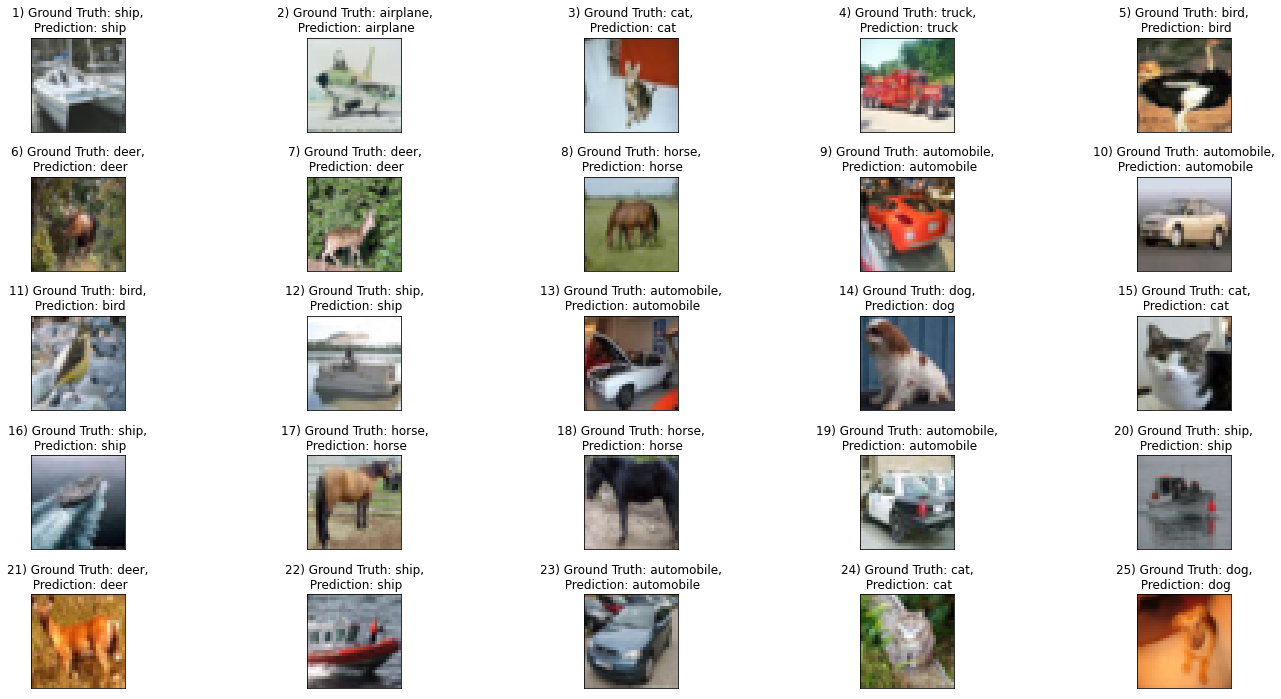

In [0]:
show_save_correctly_classified_images(network.model, network.test_loader, network.device, PATH, name="correctly_classified_imgs", max_correctly_classified_images_imgs=25)

# View Incorrectly Classified Images
---

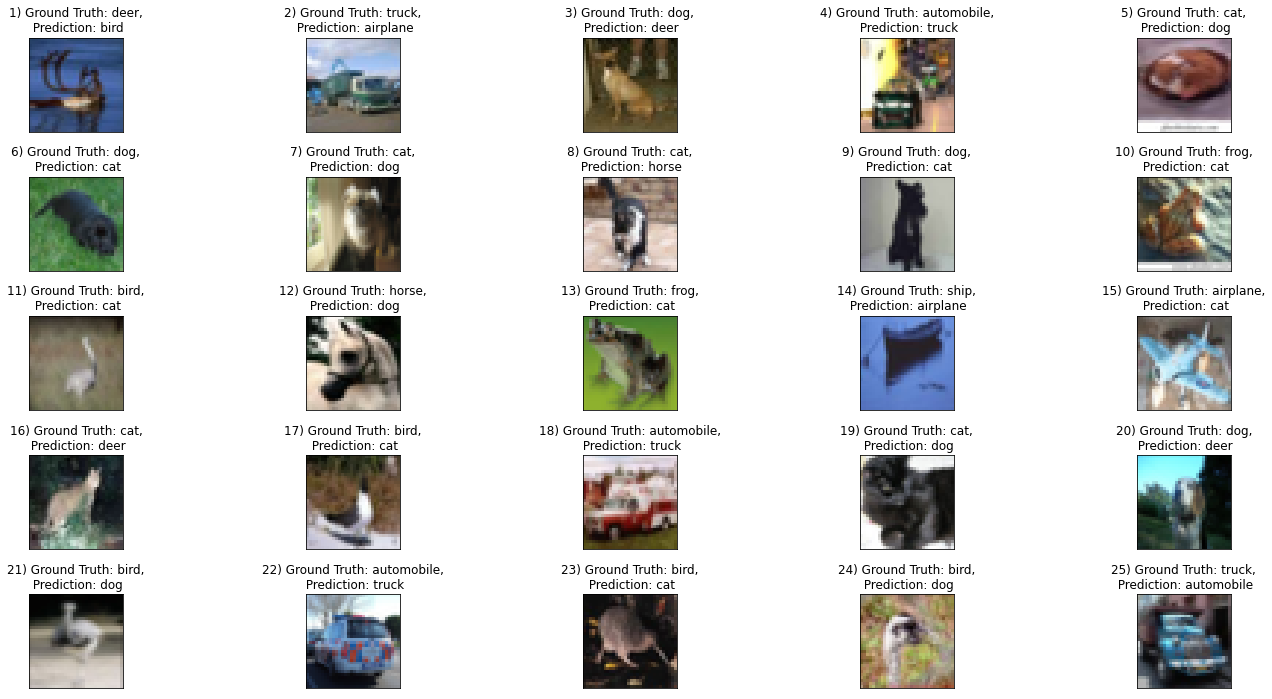

In [0]:
show_save_misclassified_images(network.model, network.test_loader, network.device, PATH, name="misclassified_imgs", max_misclassified_imgs=25)

# GradCAM Visualization
---

### Fetching correctly and incorrectly classified images

In [0]:
misclassified_imgs, correctly_classified_images = classify_images(network.model, network.test_loader, network.device, 25)

In [0]:
target_layers = ["layer1_x","rb1","layer2","rb2"]
viz_cam = VisualizeCam(network.model, network.labels_list, target_layers)

## For correctly classified images:-

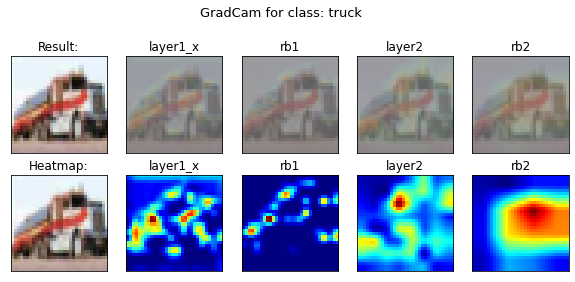

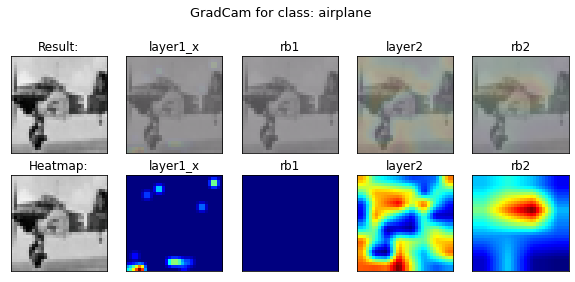

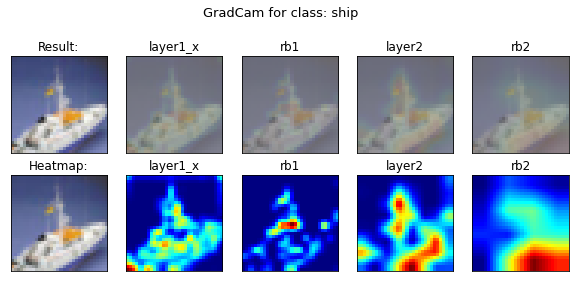

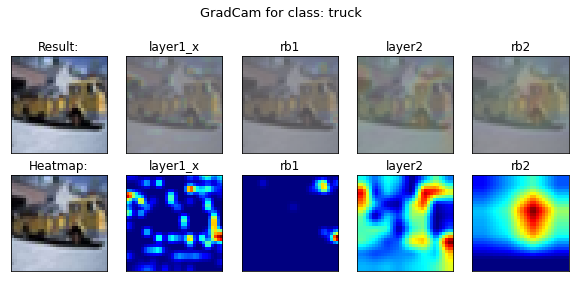

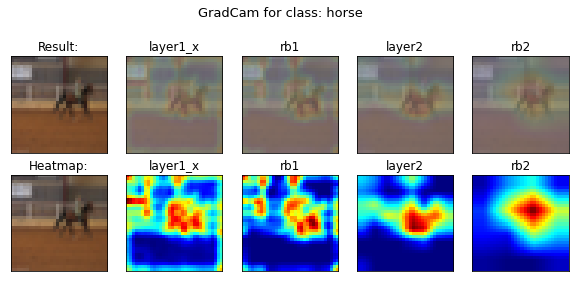

In [0]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, PATH+"/visualization", metric="correct")

## For misclassified images:-

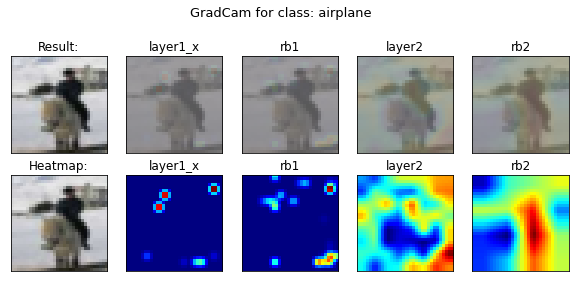

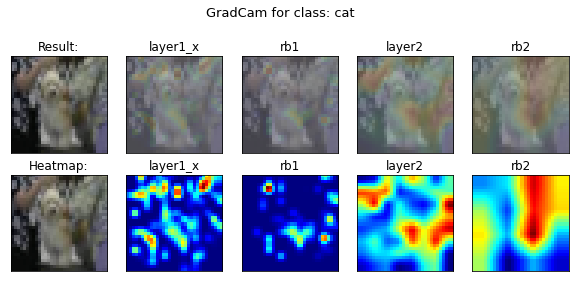

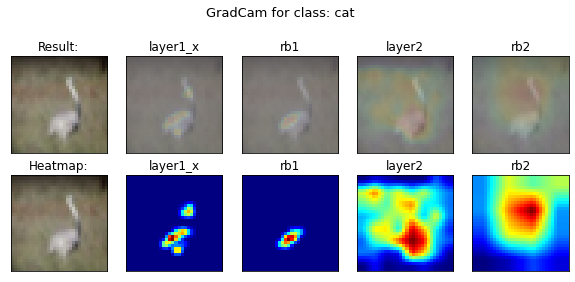

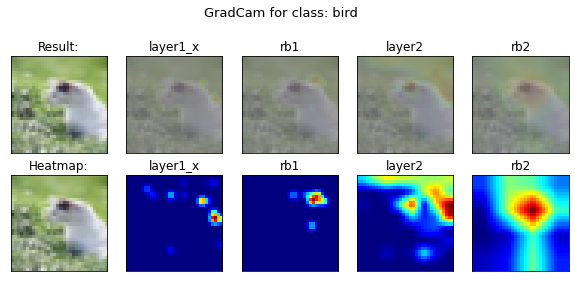

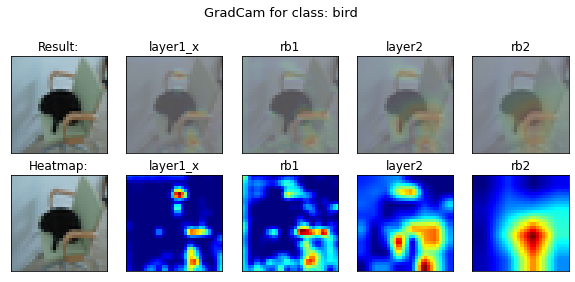

In [0]:
misclassified_pred_images = []
for i in range(len(misclassified_imgs)):
  misclassified_pred_images.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(misclassified_pred_images), target_layers, PATH+"/visualization", metric="incorrect")

# Grad-CAM for 25 misclassified images

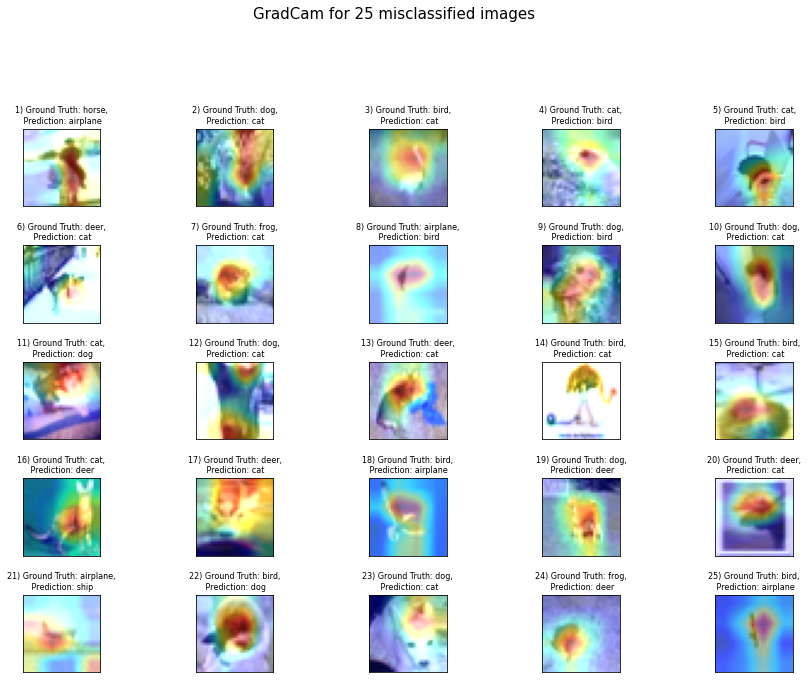

In [0]:
viz_cam.plot_img_heatmap(misclassified_imgs, target_layers, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images")